# Lab 01 - Ejercicio 6: Cuantización de Colores con K-Means

## Objetivo
Aplicar clustering para reducir el número de colores en imágenes RGB (cuantización de colores)

In [10]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import sys
sys.path.append('../src')
from kmeans import KMeans

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 1. Función de Cuantización de Colores

In [11]:
def quantize_colors(image_path, n_colors, show_results=True):
    """
    Cuantiza los colores de una imagen usando K-Means
    
    Parameters
    ----------
    image_path : str
        Ruta de la imagen
    n_colors : int
        Número de colores a reducir
    show_results : bool
        Si mostrar o no los resultados
        
    Returns
    -------
    original_image : ndarray
        Imagen original
    quantized_image : ndarray
        Imagen cuantizada
    class_map : ndarray
        Mapa de clases (cluster de cada pixel)
    """
    # Cargar imagen
    img = Image.open(image_path)
    img_array = np.array(img)
    
    print(f"Imagen original: {img_array.shape}")
    print(f"Total de píxeles: {img_array.shape[0] * img_array.shape[1]}")
    
    # Guardar dimensiones originales
    original_shape = img_array.shape
    
    # Reshape: cada pixel es un punto en espacio RGB (3D)
    # De (height, width, 3) a (height*width, 3)
    pixels = img_array.reshape(-1, 3)
    
    print(f"Pixels reshape: {pixels.shape}")
    print(f"Rango de valores: [{pixels.min()}, {pixels.max()}]")
    
    # Normalizar a [0, 1] para mejor convergencia
    pixels_normalized = pixels.astype(float) / 255.0
    
    # Aplicar K-Means
    print(f"\nAplicando K-Means con {n_colors} colores...")
    kmeans = KMeans(n_clusters=n_colors, max_iter=100, random_state=42)
    labels = kmeans.fit_predict(pixels_normalized)
    
    # Obtener colores representativos (centroides)
    colors = (kmeans.centroids * 255).astype(np.uint8)
    
    print(f"Colores representativos encontrados:")
    for i, color in enumerate(colors):
        print(f"  Color {i}: RGB{tuple(color)}")
    
    # Reconstruir imagen con colores cuantizados
    quantized_pixels = colors[labels]
    quantized_image = quantized_pixels.reshape(original_shape)
    
    # Crear mapa de clases para visualización
    class_map = labels.reshape(original_shape[:2])
    
    if show_results:
        # Visualizar resultados
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        # Imagen original
        axes[0].imshow(img_array)
        axes[0].set_title('Imagen Original', fontsize=14)
        axes[0].axis('off')
        
        # Mapa de clases
        im = axes[1].imshow(class_map, cmap='tab20')
        axes[1].set_title(f'Mapa de Clases ({n_colors} clusters)', fontsize=14)
        axes[1].axis('off')
        plt.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)
        
        # Imagen cuantizada
        axes[2].imshow(quantized_image)
        axes[2].set_title(f'Imagen Cuantizada ({n_colors} colores)', fontsize=14)
        axes[2].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Mostrar paleta de colores
        fig, ax = plt.subplots(1, 1, figsize=(12, 2))
        palette = np.array([colors]).reshape(1, -1, 3)
        ax.imshow(palette)
        ax.set_title(f'Paleta de {n_colors} Colores Extraídos', fontsize=14)
        ax.set_xticks(range(n_colors))
        ax.set_xticklabels([f'C{i}' for i in range(n_colors)])
        ax.set_yticks([])
        plt.tight_layout()
        plt.show()
    
    return img_array, quantized_image, class_map

## 2. Aplicar a 3 Imágenes

**Instrucciones:**
1. Coloca 3 imágenes en la carpeta `images/`
2. Nombra las imágenes como: `image1.jpg`, `image2.jpg`, `image3.jpg`
3. O modifica las rutas abajo según tus archivos

### Imagen 1

IMAGEN 1

Cuantización con 8 colores
Imagen original: (168, 300, 3)
Total de píxeles: 50400
Pixels reshape: (50400, 3)
Rango de valores: [0, 255]

Aplicando K-Means con 8 colores...
Convergió en la iteración 23
Colores representativos encontrados:
  Color 0: RGB(121, 44, 53)
  Color 1: RGB(190, 75, 56)
  Color 2: RGB(231, 205, 194)
  Color 3: RGB(242, 137, 88)
  Color 4: RGB(176, 136, 162)
  Color 5: RGB(124, 84, 133)
  Color 6: RGB(73, 62, 116)
  Color 7: RGB(67, 29, 41)


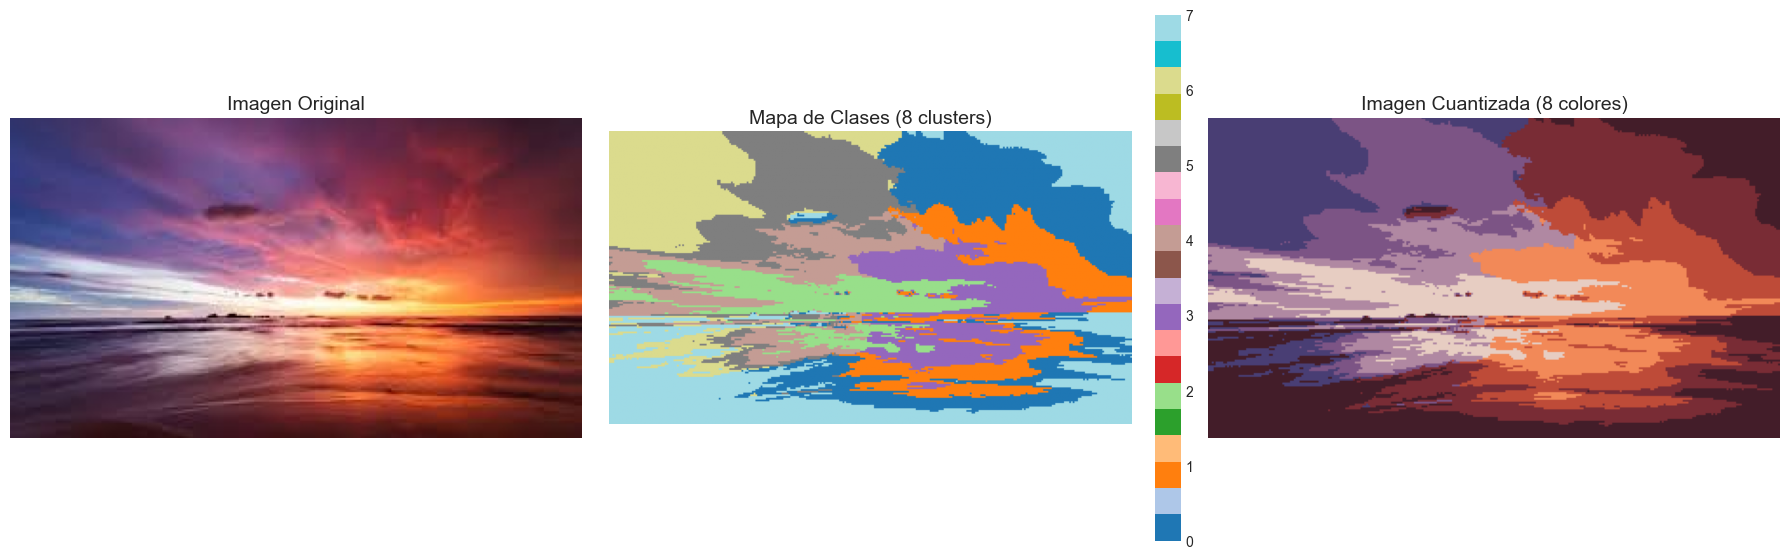

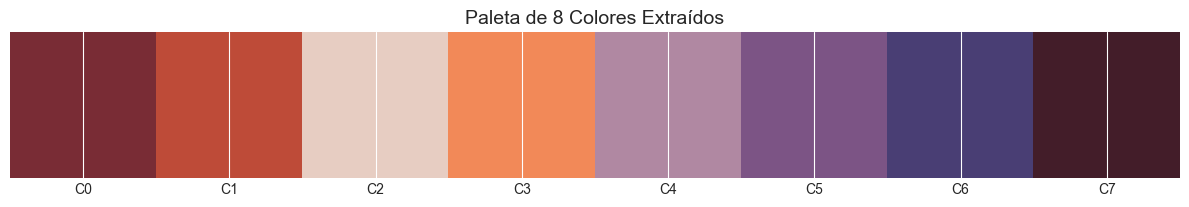


Cuantización con 16 colores
Imagen original: (168, 300, 3)
Total de píxeles: 50400
Pixels reshape: (50400, 3)
Rango de valores: [0, 255]

Aplicando K-Means con 16 colores...
Convergió en la iteración 23
Colores representativos encontrados:
  Color 0: RGB(73, 55, 97)
  Color 1: RGB(114, 38, 41)
  Color 2: RGB(172, 103, 135)
  Color 3: RGB(150, 53, 51)
  Color 4: RGB(122, 92, 145)
  Color 5: RGB(116, 67, 111)
  Color 6: RGB(67, 67, 132)
  Color 7: RGB(56, 32, 53)
  Color 8: RGB(243, 128, 69)
  Color 9: RGB(90, 40, 59)
  Color 10: RGB(68, 21, 22)
  Color 11: RGB(170, 159, 181)
  Color 12: RGB(199, 81, 58)
  Color 13: RGB(232, 218, 215)
  Color 14: RGB(223, 130, 134)
  Color 15: RGB(247, 186, 136)


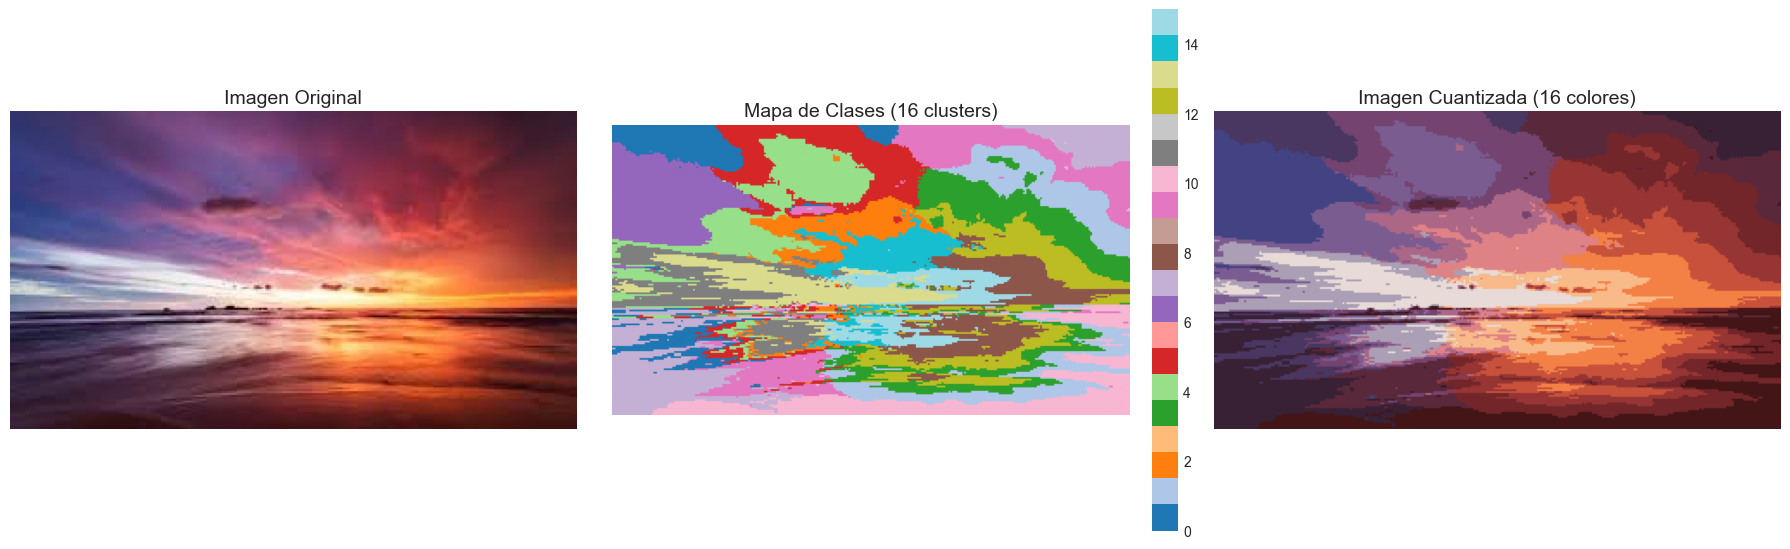

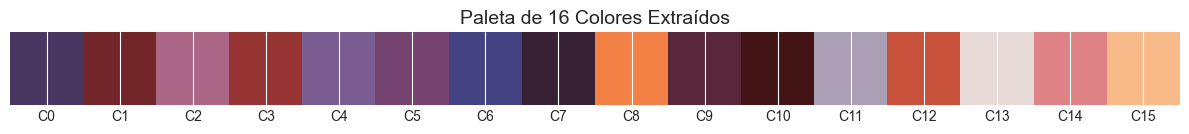


Cuantización con 32 colores
Imagen original: (168, 300, 3)
Total de píxeles: 50400
Pixels reshape: (50400, 3)
Rango de valores: [0, 255]

Aplicando K-Means con 32 colores...
Convergió en la iteración 16
Colores representativos encontrados:
  Color 0: RGB(87, 44, 67)
  Color 1: RGB(128, 39, 25)
  Color 2: RGB(134, 93, 146)
  Color 3: RGB(124, 43, 51)
  Color 4: RGB(109, 88, 145)
  Color 5: RGB(115, 54, 88)
  Color 6: RGB(78, 76, 141)
  Color 7: RGB(62, 29, 44)
  Color 8: RGB(223, 100, 65)
  Color 9: RGB(96, 36, 44)
  Color 10: RGB(54, 16, 19)
  Color 11: RGB(162, 156, 181)
  Color 12: RGB(171, 78, 85)
  Color 13: RGB(233, 131, 123)
  Color 14: RGB(202, 129, 150)
  Color 15: RGB(248, 134, 68)
  Color 16: RGB(142, 52, 69)
  Color 17: RGB(201, 185, 197)
  Color 18: RGB(140, 125, 162)
  Color 19: RGB(124, 76, 126)
  Color 20: RGB(82, 25, 22)
  Color 21: RGB(163, 57, 44)
  Color 22: RGB(61, 63, 128)
  Color 23: RGB(58, 54, 110)
  Color 24: RGB(80, 57, 96)
  Color 25: RGB(197, 77, 50)
  Colo

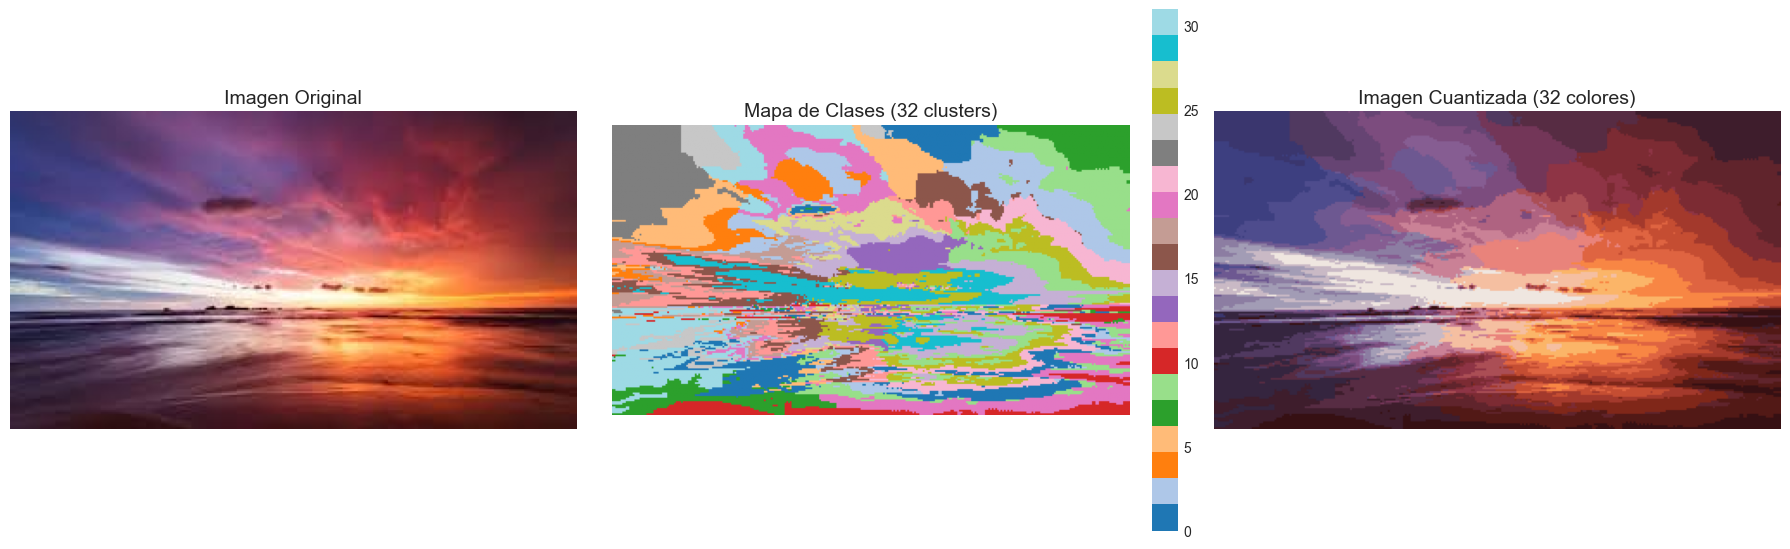

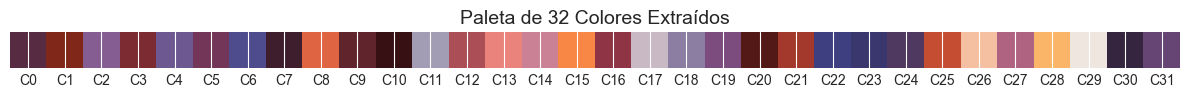

In [12]:
# Cambiar la ruta según tu imagen
image1_path = '../images/image1.jpg'

try:
    print("="*70)
    print("IMAGEN 1")
    print("="*70)
    
    # Probar con diferentes números de colores
    for n_colors in [8, 16, 32]:
        print(f"\n{'='*70}")
        print(f"Cuantización con {n_colors} colores")
        print(f"{'='*70}")
        original, quantized, class_map = quantize_colors(image1_path, n_colors)
        
except FileNotFoundError:
    print(f" No se encontró la imagen: {image1_path}")
    print("Por favor coloca una imagen en la carpeta images/")

### Imagen 2

IMAGEN 2

Cuantización con 8 colores
Imagen original: (168, 300, 3)
Total de píxeles: 50400
Pixels reshape: (50400, 3)
Rango de valores: [0, 255]

Aplicando K-Means con 8 colores...
Convergió en la iteración 10
Colores representativos encontrados:
  Color 0: RGB(215, 84, 75)
  Color 1: RGB(251, 145, 97)
  Color 2: RGB(188, 120, 197)
  Color 3: RGB(246, 155, 177)
  Color 4: RGB(10, 3, 8)
  Color 5: RGB(142, 90, 170)
  Color 6: RGB(106, 69, 94)
  Color 7: RGB(57, 33, 50)


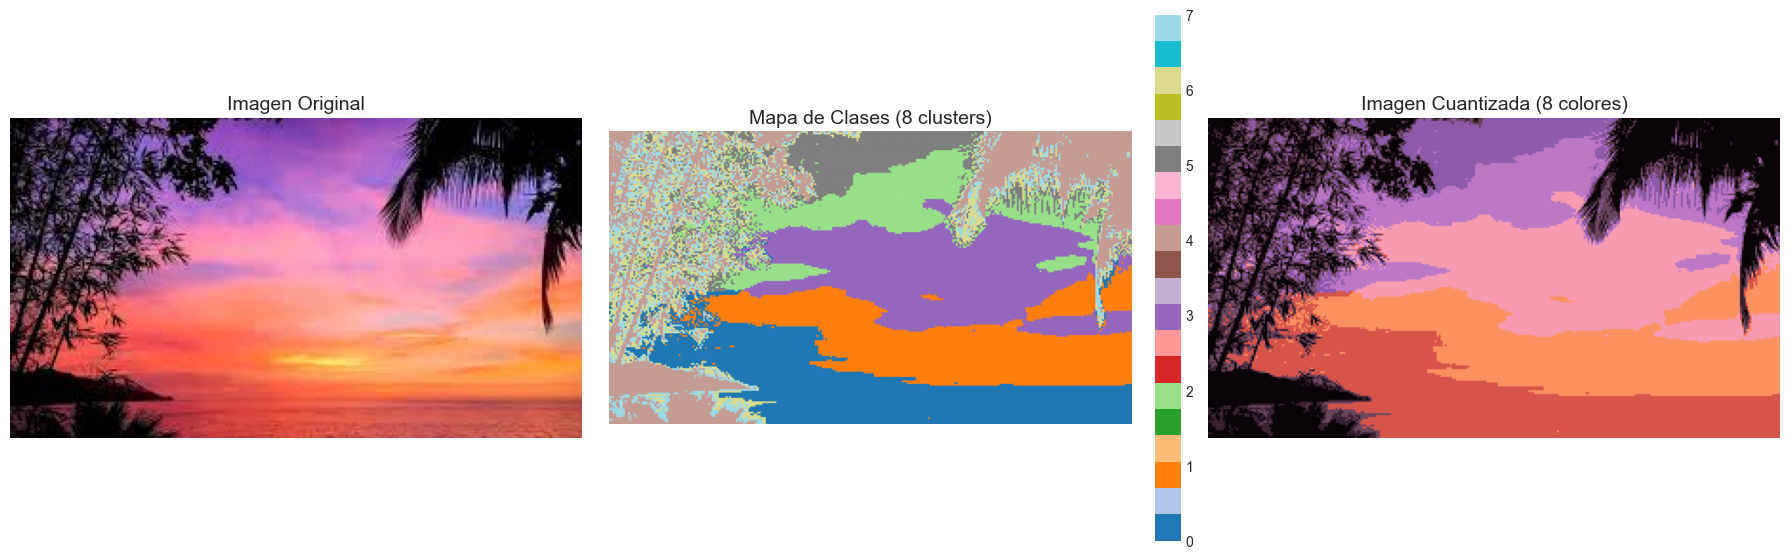

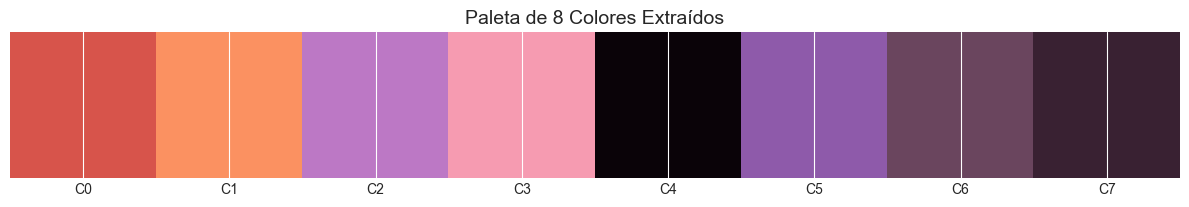


Cuantización con 16 colores
Imagen original: (168, 300, 3)
Total de píxeles: 50400
Pixels reshape: (50400, 3)
Rango de valores: [0, 255]

Aplicando K-Means con 16 colores...
Convergió en la iteración 13
Colores representativos encontrados:
  Color 0: RGB(198, 77, 72)
  Color 1: RGB(243, 99, 79)
  Color 2: RGB(153, 92, 190)
  Color 3: RGB(177, 116, 204)
  Color 4: RGB(7, 2, 7)
  Color 5: RGB(140, 106, 139)
  Color 6: RGB(106, 74, 103)
  Color 7: RGB(42, 21, 36)
  Color 8: RGB(249, 155, 186)
  Color 9: RGB(128, 71, 168)
  Color 10: RGB(251, 165, 152)
  Color 11: RGB(78, 47, 66)
  Color 12: RGB(216, 134, 197)
  Color 13: RGB(252, 154, 115)
  Color 14: RGB(204, 123, 156)
  Color 15: RGB(251, 145, 78)


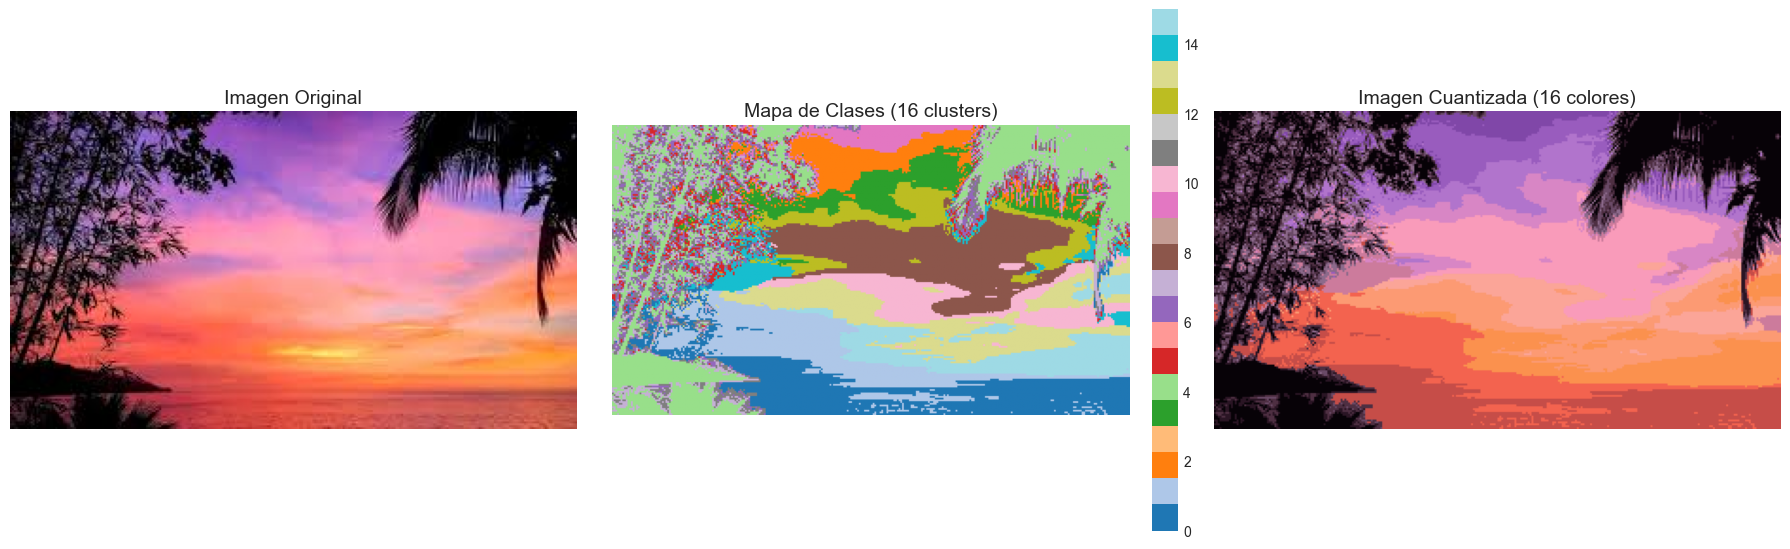

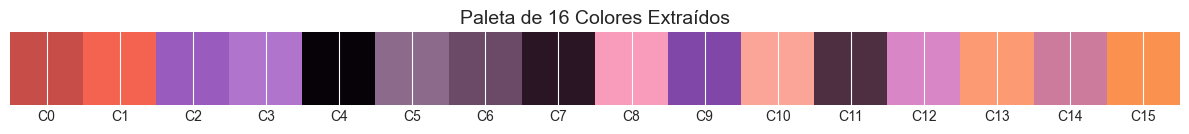


Cuantización con 32 colores
Imagen original: (168, 300, 3)
Total de píxeles: 50400
Pixels reshape: (50400, 3)
Rango de valores: [0, 255]

Aplicando K-Means con 32 colores...
Convergió en la iteración 21
Colores representativos encontrados:
  Color 0: RGB(183, 68, 69)
  Color 1: RGB(210, 158, 147)
  Color 2: RGB(159, 103, 195)
  Color 3: RGB(179, 118, 205)
  Color 4: RGB(19, 8, 32)
  Color 5: RGB(147, 81, 184)
  Color 6: RGB(111, 84, 114)
  Color 7: RGB(94, 36, 44)
  Color 8: RGB(229, 140, 184)
  Color 9: RGB(122, 70, 163)
  Color 10: RGB(249, 174, 172)
  Color 11: RGB(135, 60, 68)
  Color 12: RGB(209, 130, 202)
  Color 13: RGB(252, 164, 122)
  Color 14: RGB(197, 117, 159)
  Color 15: RGB(253, 174, 98)
  Color 16: RGB(204, 92, 84)
  Color 17: RGB(246, 115, 114)
  Color 18: RGB(59, 5, 9)
  Color 19: RGB(58, 43, 66)
  Color 20: RGB(217, 76, 67)
  Color 21: RGB(142, 109, 143)
  Color 22: RGB(17, 5, 11)
  Color 23: RGB(40, 27, 42)
  Color 24: RGB(245, 95, 77)
  Color 25: RGB(251, 154, 188)

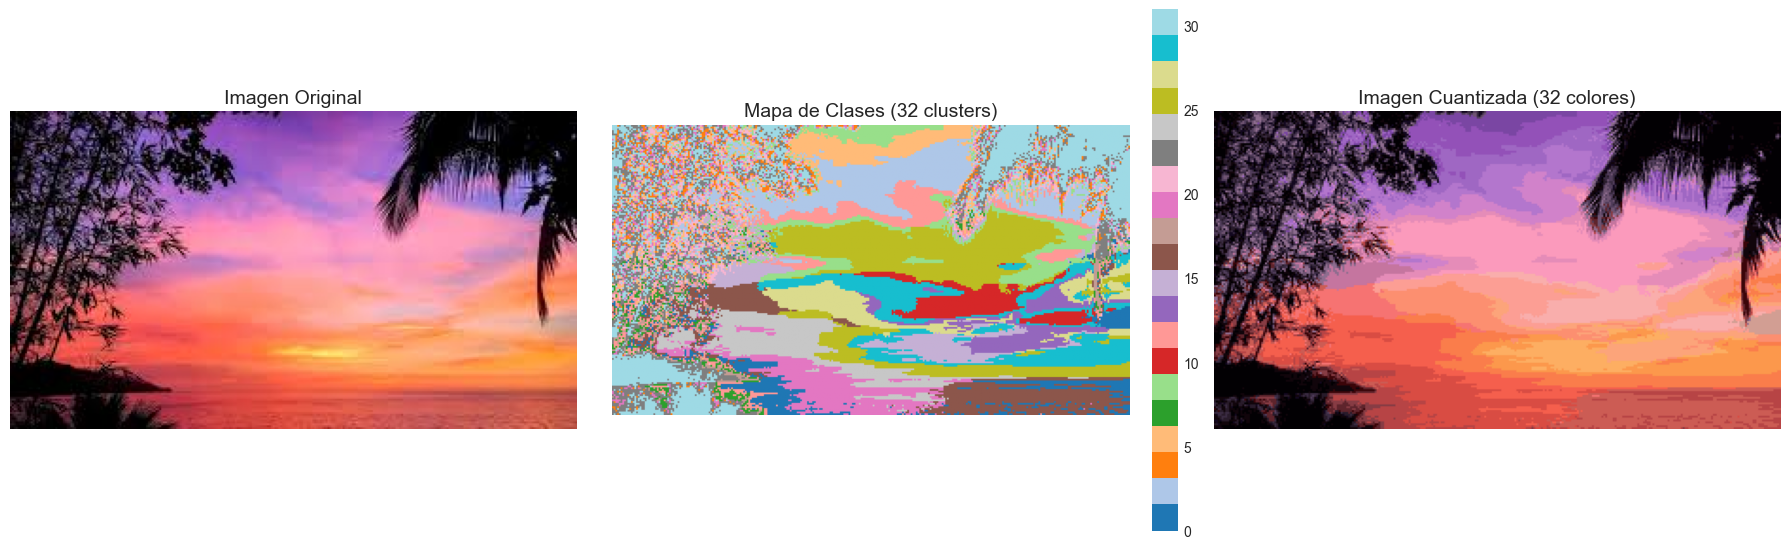

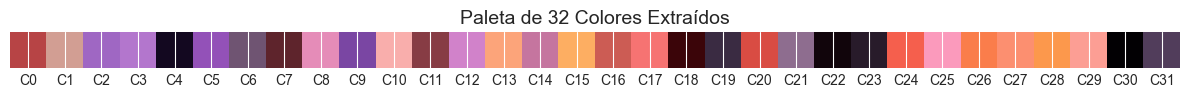

In [13]:
image2_path = '../images/image2.jpg'

try:
    print("="*70)
    print("IMAGEN 2")
    print("="*70)
    
    for n_colors in [8, 16, 32]:
        print(f"\n{'='*70}")
        print(f"Cuantización con {n_colors} colores")
        print(f"{'='*70}")
        original, quantized, class_map = quantize_colors(image2_path, n_colors)
        
except FileNotFoundError:
    print(f"⚠️ No se encontró la imagen: {image2_path}")

### Imagen 3

IMAGEN 3

Cuantización con 8 colores
Imagen original: (183, 275, 3)
Total de píxeles: 50325
Pixels reshape: (50325, 3)
Rango de valores: [0, 255]

Aplicando K-Means con 8 colores...
Convergió en la iteración 22
Colores representativos encontrados:
  Color 0: RGB(187, 60, 24)
  Color 1: RGB(225, 111, 75)
  Color 2: RGB(243, 87, 8)
  Color 3: RGB(50, 18, 29)
  Color 4: RGB(120, 52, 44)
  Color 5: RGB(251, 142, 5)
  Color 6: RGB(152, 113, 105)
  Color 7: RGB(6, 3, 6)


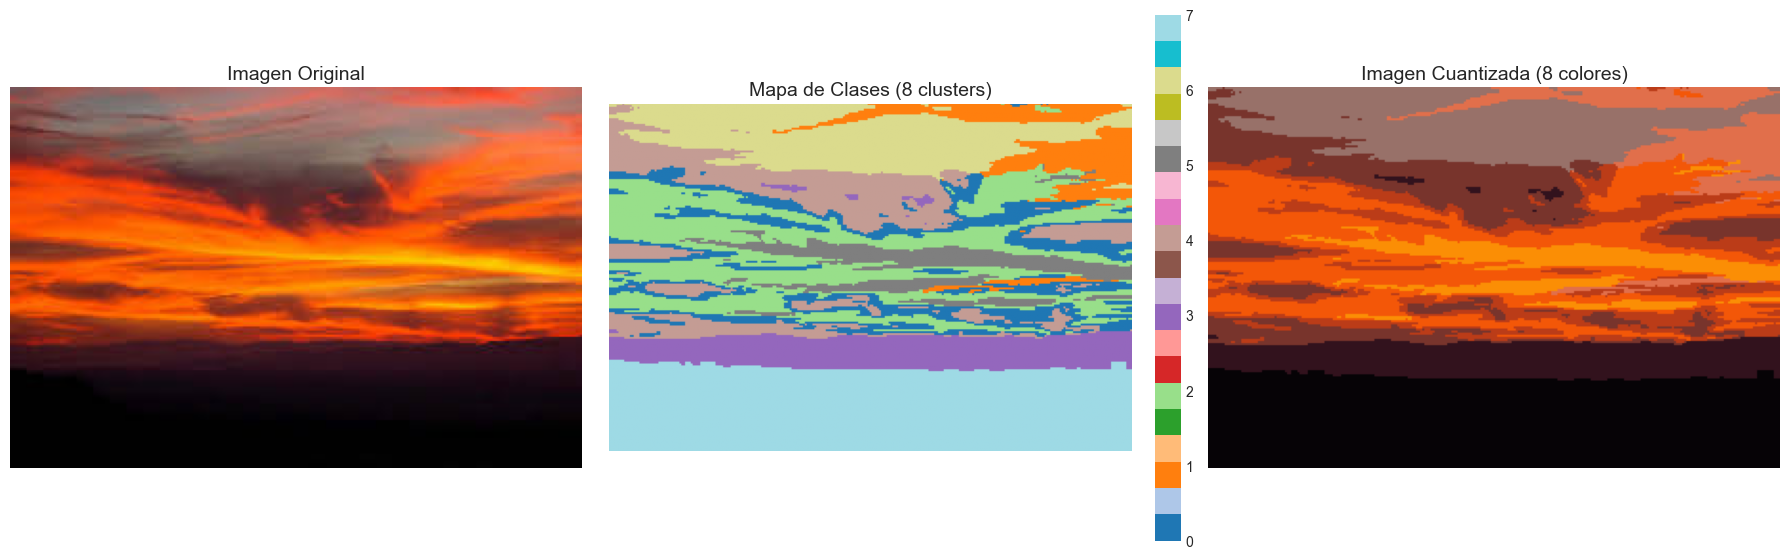

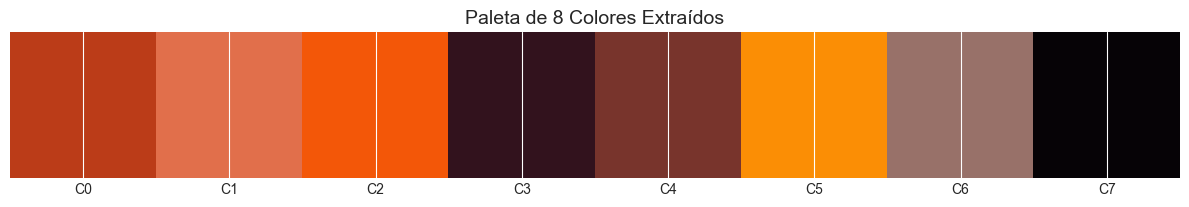


Cuantización con 16 colores
Imagen original: (183, 275, 3)
Total de píxeles: 50325
Pixels reshape: (50325, 3)
Rango de valores: [0, 255]

Aplicando K-Means con 16 colores...
Convergió en la iteración 22
Colores representativos encontrados:
  Color 0: RGB(188, 60, 23)
  Color 1: RGB(204, 104, 65)
  Color 2: RGB(220, 69, 14)
  Color 3: RGB(92, 44, 46)
  Color 4: RGB(156, 52, 30)
  Color 5: RGB(241, 100, 36)
  Color 6: RGB(183, 120, 110)
  Color 7: RGB(5, 2, 5)
  Color 8: RGB(126, 44, 33)
  Color 9: RGB(119, 82, 76)
  Color 10: RGB(45, 16, 27)
  Color 11: RGB(252, 164, 3)
  Color 12: RGB(244, 113, 70)
  Color 13: RGB(247, 84, 5)
  Color 14: RGB(142, 113, 106)
  Color 15: RGB(251, 113, 4)


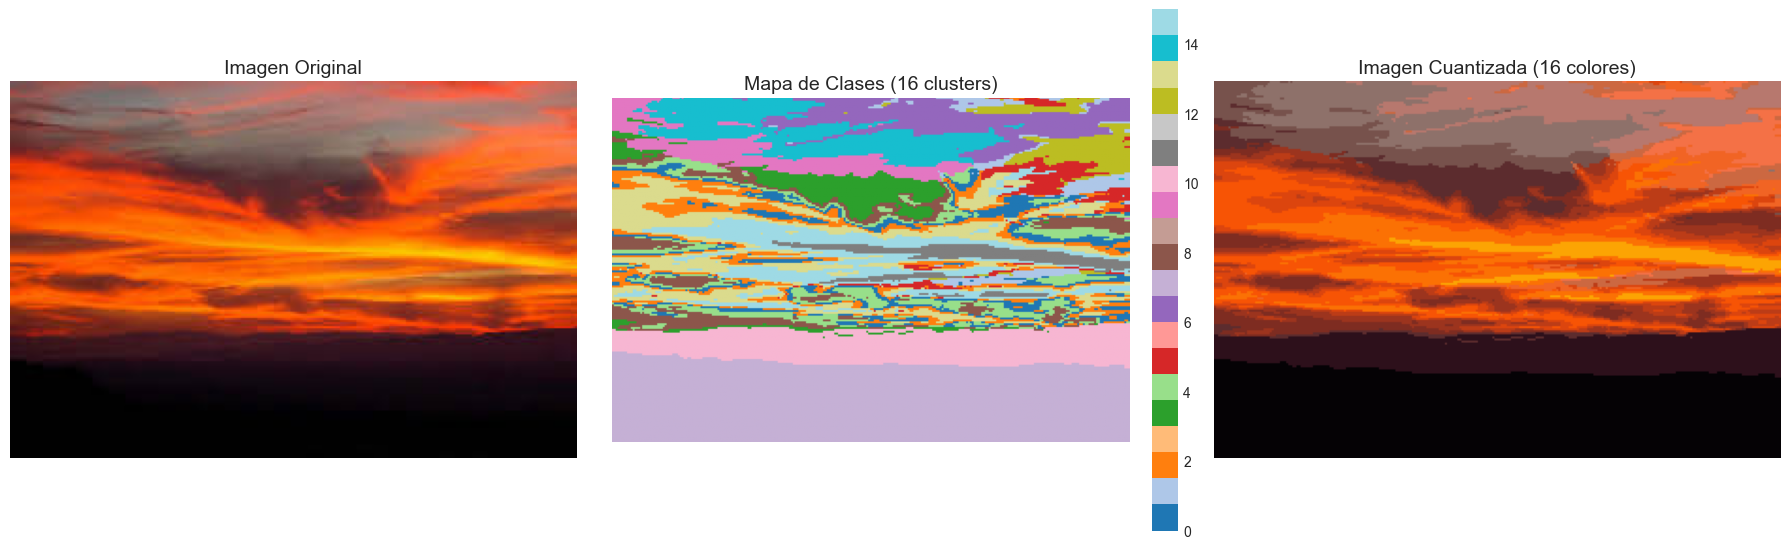

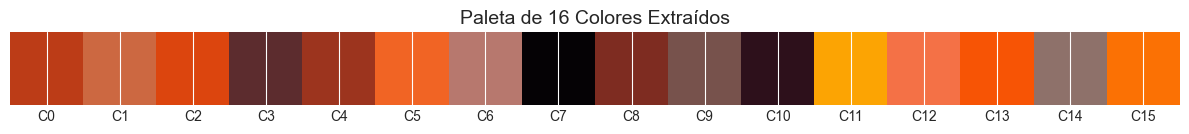


Cuantización con 32 colores
Imagen original: (183, 275, 3)
Total de píxeles: 50325
Pixels reshape: (50325, 3)
Rango de valores: [0, 255]

Aplicando K-Means con 32 colores...
Convergió en la iteración 13
Colores representativos encontrados:
  Color 0: RGB(205, 80, 33)
  Color 1: RGB(237, 107, 76)
  Color 2: RGB(206, 60, 15)
  Color 3: RGB(128, 67, 59)
  Color 4: RGB(160, 47, 24)
  Color 5: RGB(235, 90, 29)
  Color 6: RGB(204, 114, 99)
  Color 7: RGB(1, 1, 1)
  Color 8: RGB(160, 62, 36)
  Color 9: RGB(130, 109, 102)
  Color 10: RGB(13, 6, 13)
  Color 11: RGB(251, 179, 3)
  Color 12: RGB(251, 115, 49)
  Color 13: RGB(226, 69, 10)
  Color 14: RGB(152, 123, 115)
  Color 15: RGB(245, 75, 5)
  Color 16: RGB(27, 10, 21)
  Color 17: RGB(120, 89, 82)
  Color 18: RGB(47, 17, 28)
  Color 19: RGB(249, 92, 4)
  Color 20: RGB(252, 137, 4)
  Color 21: RGB(90, 44, 46)
  Color 22: RGB(183, 57, 23)
  Color 23: RGB(100, 69, 66)
  Color 24: RGB(137, 46, 31)
  Color 25: RGB(112, 38, 32)
  Color 26: RGB(177

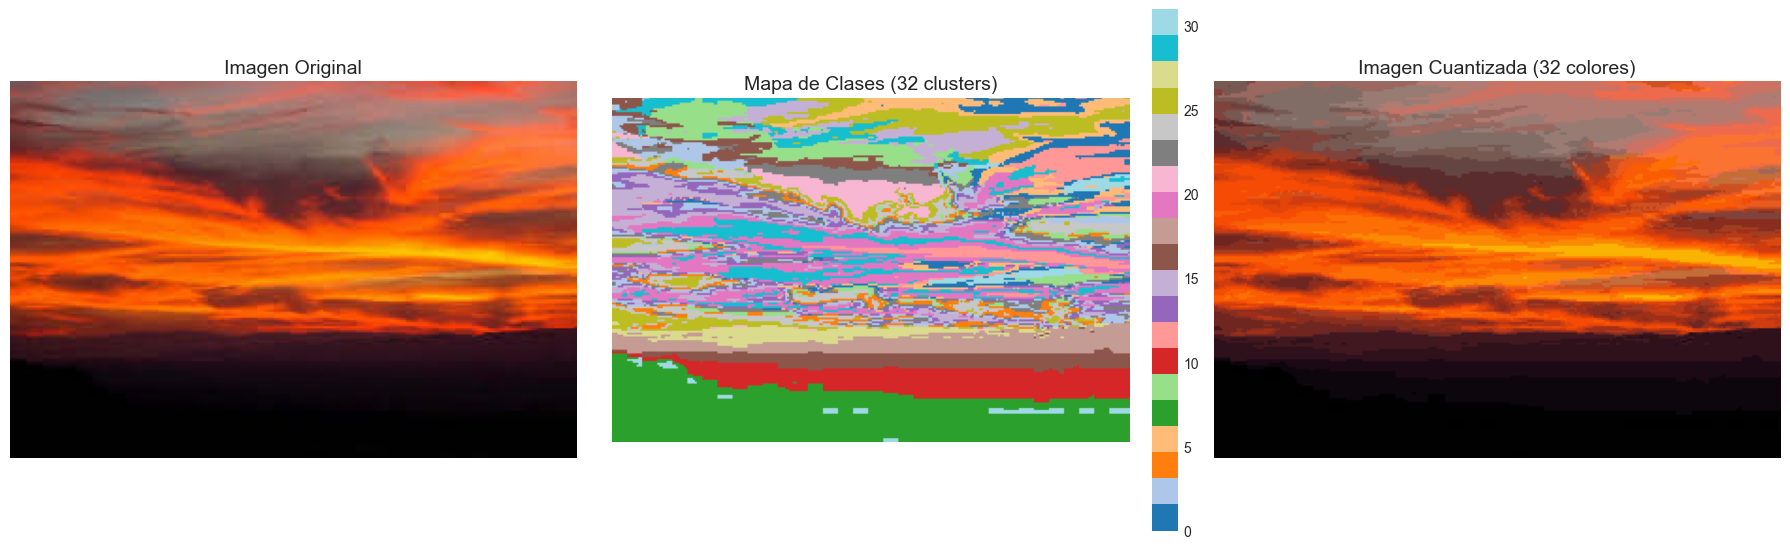

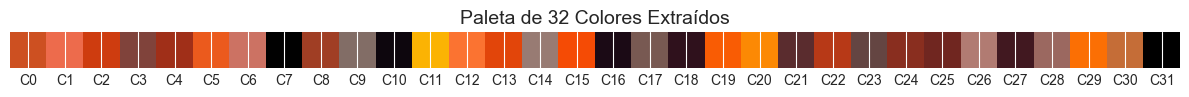

In [14]:
image3_path = '../images/image3.jpg'

try:
    print("="*70)
    print("IMAGEN 3")
    print("="*70)
    
    for n_colors in [8, 16, 32]:
        print(f"\n{'='*70}")
        print(f"Cuantización con {n_colors} colores")
        print(f"{'='*70}")
        original, quantized, class_map = quantize_colors(image3_path, n_colors)
        
except FileNotFoundError:
    print(f"⚠️ No se encontró la imagen: {image3_path}")

## 3. Comparación de Diferentes Valores de K

Procesando k=4...
Imagen original: (168, 300, 3)
Total de píxeles: 50400
Pixels reshape: (50400, 3)
Rango de valores: [0, 255]

Aplicando K-Means con 4 colores...
Convergió en la iteración 9
Colores representativos encontrados:
  Color 0: RGB(103, 76, 128)
  Color 1: RGB(91, 36, 47)
  Color 2: RGB(214, 175, 172)
  Color 3: RGB(208, 96, 68)
Procesando k=8...
Imagen original: (168, 300, 3)
Total de píxeles: 50400
Pixels reshape: (50400, 3)
Rango de valores: [0, 255]

Aplicando K-Means con 8 colores...
Convergió en la iteración 23
Colores representativos encontrados:
  Color 0: RGB(121, 44, 53)
  Color 1: RGB(190, 75, 56)
  Color 2: RGB(231, 205, 194)
  Color 3: RGB(242, 137, 88)
  Color 4: RGB(176, 136, 162)
  Color 5: RGB(124, 84, 133)
  Color 6: RGB(73, 62, 116)
  Color 7: RGB(67, 29, 41)
Procesando k=16...
Imagen original: (168, 300, 3)
Total de píxeles: 50400
Pixels reshape: (50400, 3)
Rango de valores: [0, 255]

Aplicando K-Means con 16 colores...
Convergió en la iteración 23
Colore

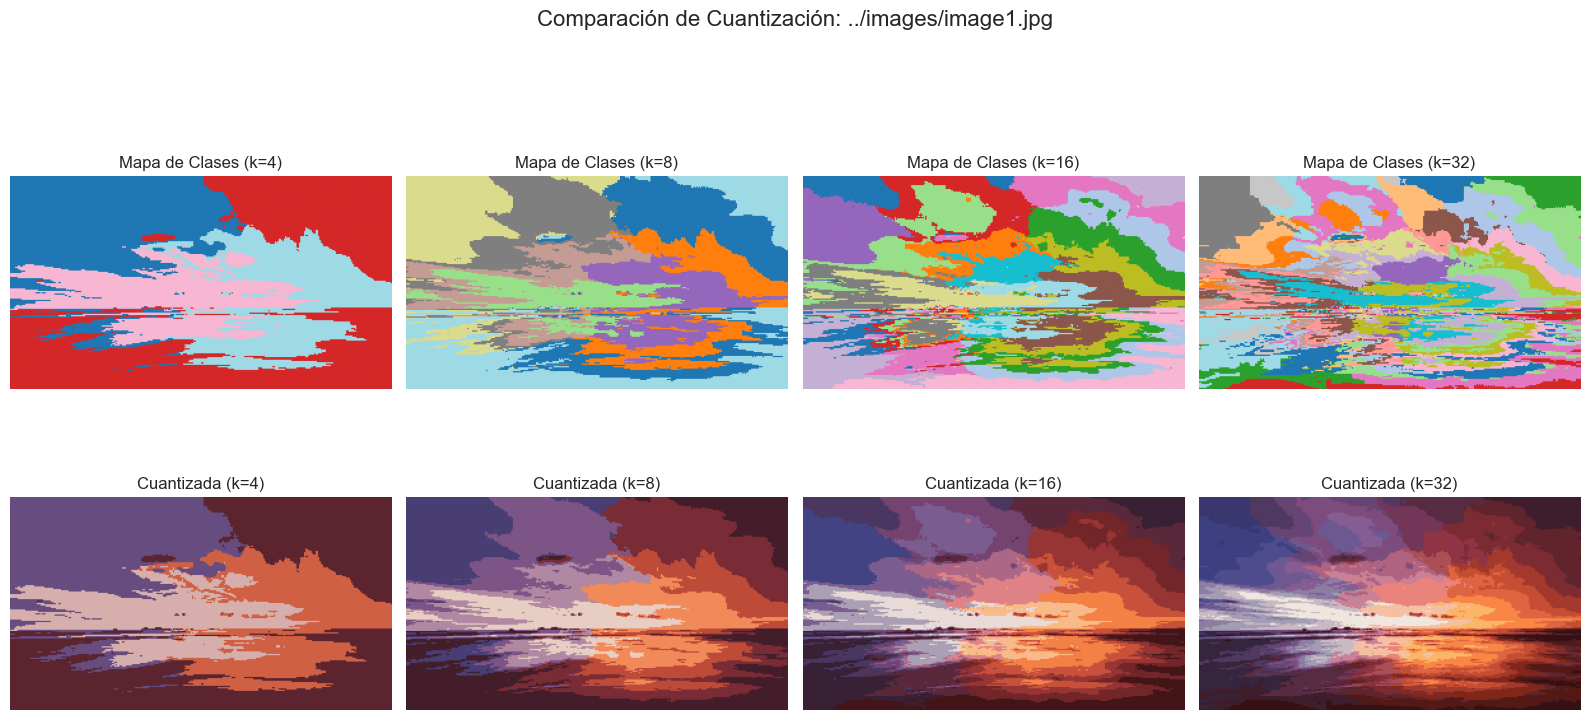

In [15]:
# Comparación con múltiples valores de k en una sola imagen
def compare_quantization_levels(image_path, k_values=[4, 8, 16, 32, 64]):
    """
    Comparar cuantización con diferentes números de colores
    """
    img = Image.open(image_path)
    img_array = np.array(img)
    
    n_comparisons = len(k_values)
    fig, axes = plt.subplots(2, n_comparisons, figsize=(4*n_comparisons, 8))
    
    for idx, k in enumerate(k_values):
        print(f"Procesando k={k}...")
        original, quantized, class_map = quantize_colors(image_path, k, show_results=False)
        
        # Mapa de clases
        axes[0, idx].imshow(class_map, cmap='tab20')
        axes[0, idx].set_title(f'Mapa de Clases (k={k})', fontsize=12)
        axes[0, idx].axis('off')
        
        # Imagen cuantizada
        axes[1, idx].imshow(quantized)
        axes[1, idx].set_title(f'Cuantizada (k={k})', fontsize=12)
        axes[1, idx].axis('off')
    
    plt.suptitle(f'Comparación de Cuantización: {image_path}', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.savefig('../results/color_quantization_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# Ejecutar comparación
try:
    compare_quantization_levels(image1_path, k_values=[4, 8, 16, 32])
except:
    print("No se pudo realizar la comparación. Verifica que la imagen exista.")

## 4. Análisis del Tamaño de Archivo

Imagen original: (168, 300, 3)
Total de píxeles: 50400
Pixels reshape: (50400, 3)
Rango de valores: [0, 255]

Aplicando K-Means con 4 colores...
Convergió en la iteración 9
Colores representativos encontrados:
  Color 0: RGB(103, 76, 128)
  Color 1: RGB(91, 36, 47)
  Color 2: RGB(214, 175, 172)
  Color 3: RGB(208, 96, 68)
Imagen original: (168, 300, 3)
Total de píxeles: 50400
Pixels reshape: (50400, 3)
Rango de valores: [0, 255]

Aplicando K-Means con 8 colores...
Convergió en la iteración 23
Colores representativos encontrados:
  Color 0: RGB(121, 44, 53)
  Color 1: RGB(190, 75, 56)
  Color 2: RGB(231, 205, 194)
  Color 3: RGB(242, 137, 88)
  Color 4: RGB(176, 136, 162)
  Color 5: RGB(124, 84, 133)
  Color 6: RGB(73, 62, 116)
  Color 7: RGB(67, 29, 41)
Imagen original: (168, 300, 3)
Total de píxeles: 50400
Pixels reshape: (50400, 3)
Rango de valores: [0, 255]

Aplicando K-Means con 16 colores...
Convergió en la iteración 23
Colores representativos encontrados:
  Color 0: RGB(73, 55, 9

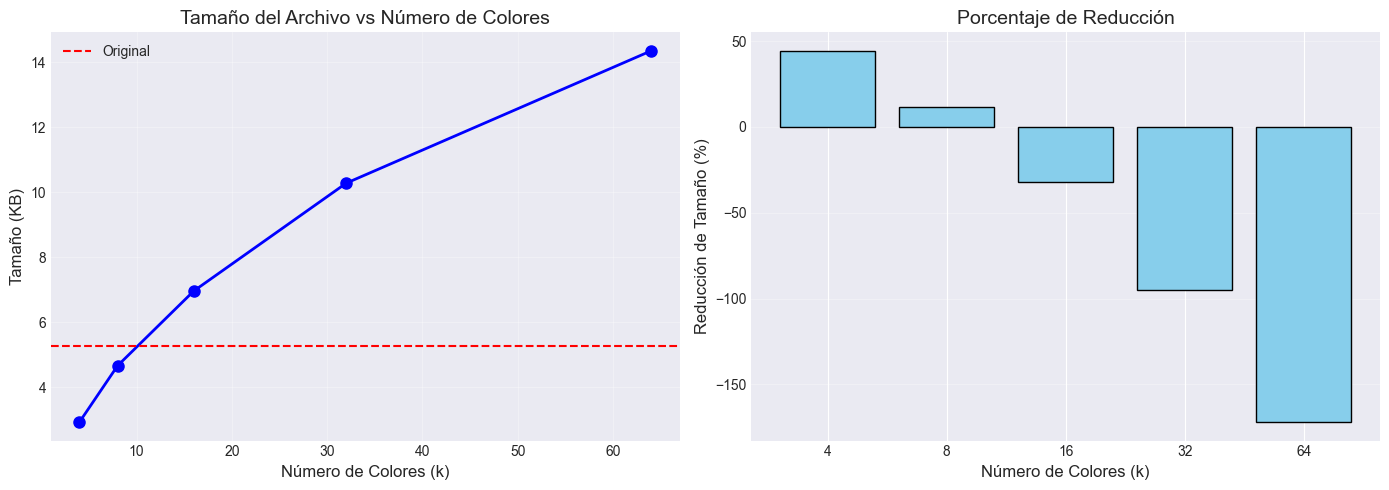

In [16]:
import os
from io import BytesIO

def analyze_compression(image_path, k_values=[4, 8, 16, 32, 64]):
    """
    Analizar reducción de tamaño al cuantizar colores
    """
    results = []
    
    # Tamaño original
    original_size = os.path.getsize(image_path)
    
    for k in k_values:
        _, quantized, _ = quantize_colors(image_path, k, show_results=False)
        
        # Guardar temporalmente para medir tamaño
        quantized_img = Image.fromarray(quantized)
        buffer = BytesIO()
        quantized_img.save(buffer, format='PNG')
        quantized_size = buffer.tell()
        
        reduction = (1 - quantized_size/original_size) * 100
        
        results.append({
            'K': k,
            'Tamaño (KB)': quantized_size / 1024,
            'Reducción (%)': reduction
        })
    
    import pandas as pd
    df_results = pd.DataFrame(results)
    
    print("\nAnálisis de Compresión:")
    print(f"Tamaño original: {original_size/1024:.2f} KB")
    print("\n" + df_results.to_string(index=False))
    
    # Graficar
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].plot(df_results['K'], df_results['Tamaño (KB)'], 'bo-', linewidth=2, markersize=8)
    axes[0].axhline(y=original_size/1024, color='r', linestyle='--', label='Original')
    axes[0].set_xlabel('Número de Colores (k)', fontsize=12)
    axes[0].set_ylabel('Tamaño (KB)', fontsize=12)
    axes[0].set_title('Tamaño del Archivo vs Número de Colores', fontsize=14)
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    axes[1].bar(df_results['K'].astype(str), df_results['Reducción (%)'], color='skyblue', edgecolor='black')
    axes[1].set_xlabel('Número de Colores (k)', fontsize=12)
    axes[1].set_ylabel('Reducción de Tamaño (%)', fontsize=12)
    axes[1].set_title('Porcentaje de Reducción', fontsize=14)
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig('../results/compression_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# Ejecutar análisis
try:
    analyze_compression(image1_path)
except:
    print("No se pudo realizar el análisis de compresión.")

## Conclusiones

1. **¿Cómo afecta el número de clusters (k) a la calidad de la imagen?**
   A mayor k, mejor calidad visual ya que se preservan más detalles y gradientes. Con pocos colores k=8 se pierden detalles finos y aparece "banding", mientras que con k=32+ la imagen es casi indistinguible de la original.

2. **¿Cuál es un buen balance entre calidad y reducción de colores?**
   Un valor de k=16-32 suele ofrecer un buen equilibrio: mantiene la calidad visual aceptable mientras reduce significativamente la paleta de colores y el tamaño del archivo.

3. **¿En qué aplicaciones prácticas podría ser útil la cuantización de colores?**
   Compresión de imágenes para web, creación de paletas para pixel art, reducción de colores para impresión, simplificación de imágenes para segmentación, y optimización de gráficos para dispositivos con memoria limitada.
   